# Stationary Equilibrium

In this notebook, I illustrate the solution to the **stationary equilibrium** for the housing model.

## Setup and Solve

In [288]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from scipy import optimize
from consav import linear_interp
from scipy import stats

# load the DurableConsumptionModel module
from HousingModel import HousingModelClass

# Set the number of threads in numba
nb.set_num_threads(2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Something for figure layout here

In [203]:
# Define the model
model = HousingModelClass(name='example_negm',par={'solmethod':'negm', 'do_print':False})

# Define parameter values here
# ..
# ..

# Solve and simulate
model.precompile_numba()
model.solve()
model.simulate()

# Find stationary equilibrium

Find demand curve over a grid of house prices

In [207]:
# Grid over house prices
Nr = 15
p_vec = np.linspace(0.5,1.5,Nr)
p_min = p_vec[0]
p_max = p_vec[Nr-1]

# Supply
Hs = 4.1 # Find some value

# Initialize demand function
Hd = np.zeros(shape=len(p_vec))

# Loop
t0 = time.time()
for i_p,p in enumerate(p_vec):
    
    # Solve and simulate model
    model.par.ph = p
    model.solve()
    model.simulate()
    
    # Aggregate demand
    Hd[i_p] = np.mean(model.sim.d[175:199,:])
    
    # Bound on p
    diff = Hs - Hd[i_p]
    if diff < 0: p_min = np.fmax(p_min, p_vec[i_p])
    if diff > 0: p_max = np.fmin(p_max, p_vec[i_p])
    
    # print(i_p)
    
t1 = time.time()

In [208]:
print(t1-t0)

908.0792598724365


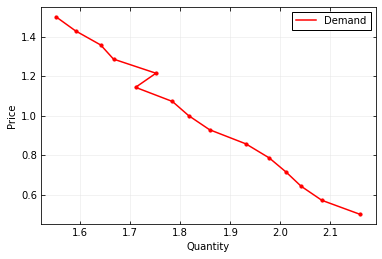

In [213]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(Hd,p_vec, color = 'red', label = 'Demand',zorder=2)
ax.scatter(Hd,p_vec, color = 'red',zorder=3, marker='o', s=10)

# ax.vlines(Hs_true,0,10, color = 'blue', linestyle = '-', label ='Supply')
# ax.plot(Hd,supply, color = 'blue', linestyle = ':')

# ax.hlines(p_min,0,0.15, linestyle='--', color = '0.2', linewidth = 1)
# ax.hlines(p_max,0.0,0.15, linestyle='--', color = '0.2', linewidth = 1)

# ax.set_xlim(1.2,1.65)
# ax.set_ylim(0.4,1.6)
ax.set_xlabel('Quantity')
ax.set_ylabel('Price')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

# plt.savefig('../../tex/figs/equilibrium.pdf')

Last step

In [ ]:
def obj(p,model):
    
    model.par.ph = p
    model.solve()
    model.simulate()
    return np.mean(model.sim.n[-1,:]) - Hs

t0 = time.time()

opt = optimize.root_scalar(obj,bracket=[p_min,p_max],method='bisect',args=(model,),maxiter=100)
model.par.ph = opt.root
assert opt.converged

t1 = time.time()
print(t1-t0)

In [ ]:
print(opt)

## Plot Results

Plot the **policy functions** and **stationary distributions** from the model.
Also illustrate convergence of the distributions

In [202]:
del model1
del model2

In [188]:
model1 = HousingModelClass(name='example_negm',par={'solmethod':'negm', 'ph':p_vec[9], 'do_print':False})
model1.solve()

In [189]:
model2 = HousingModelClass(name='example_negm',par={'solmethod':'negm', 'ph':p_vec[10], 'do_print':False})
model2.solve()

In [199]:
model1.simulate()
model2.simulate()

In [196]:
model1.par.grid_n

array([0.        , 2.5       , 2.60869565, 2.7173913 , 2.82608696,
       2.93478261, 3.04347826, 3.15217391, 3.26086957, 3.36956522,
       3.47826087, 3.58695652, 3.69565217, 3.80434783, 3.91304348,
       4.02173913, 4.13043478, 4.23913043, 4.34782609, 4.45652174,
       4.56521739, 4.67391304, 4.7826087 , 4.89130435, 5.        ])

In [197]:
model1.sol.d_adj[0,0,1,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 2.5       ,
       2.5       , 2.5       , 2.5       , 2.60869565, 2.7173913 ,
       2.82608696, 3.04347826, 3.15217391, 3.26086957, 3.36956522,
       3.36956522, 3.36956522, 3.47826087, 3.58695652, 3.58695652,
       3.58695652, 3.69565217, 3.69565217, 3.69565217, 3.69565217,
       3.80434783, 3.80434783, 3.80434783, 3.91304348, 3.91304348,
       3.91304348, 3.91304348, 4.02173913, 4.02173913, 4.02173913,
       4.02173913, 4.13043478, 4.13043478, 4.13043478, 4.13043478,
       4.23913043, 4.23913043, 4.23913043, 4.23913043, 4.34782609,
       4.34782609, 4.34782609, 4.34782609, 4.45652174, 4.45652174,
       4.45652174, 4.45652174, 4.56521739, 4.56521739, 4.56521

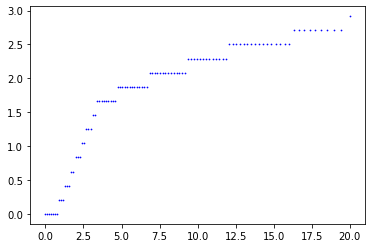

In [210]:
# plt.plot(model1.par.grid_x,model1.sol.d_adj[0,0,1,:], color = 'blue')
# plt.plot(model2.par.grid_x,model2.sol.d_adj[0,0,1,:], color = 'green')
plt.scatter(model.par.grid_x,model.sol.d_adj[0,0,1,:], color = 'blue', s = 0.5)


# plt.plot(model1.par.grid_m,model1.sol.c_keep[0,0,1,1,:], color = 'blue')
# plt.plot(model2.par.grid_m,model2.sol.c_keep[0,0,1,1,:], color = 'green')

In [211]:
np.min(model2.sim.d[-1])

NameError: name 'model2' is not defined

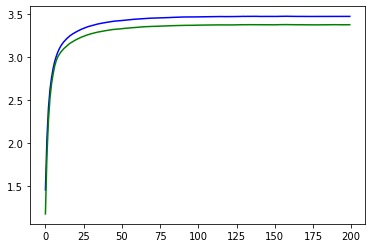

In [200]:
plt.plot(np.mean(model1.sim.d, axis = 1), color = 'blue')
plt.plot(np.mean(model2.sim.d, axis = 1), color = 'green')
# plt.ylim(3,4)

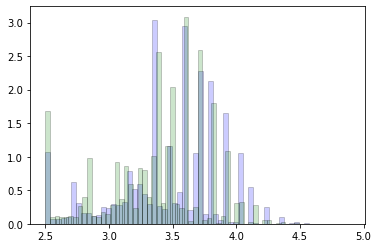

In [201]:
# plt.hist(model1.sim.a[-1,:] + model1.sim.d[-1,:], 60, density = True, facecolor='blue', edgecolor = 'k', zorder=2, alpha = .2)
# plt.hist(model2.sim.a[-1,:] + model2.sim.d[-1,:], 60, density = True, facecolor='green', edgecolor = 'k', zorder=2, alpha = .2)
# plt.show()

plt.hist(model1.sim.d[-1,:], 60, density = True, facecolor='blue', edgecolor = 'k', zorder=2, alpha = .2)
plt.hist(model2.sim.d[-1,:], 60, density = True, facecolor='green', edgecolor = 'k', zorder=2, alpha = .2)
plt.show()

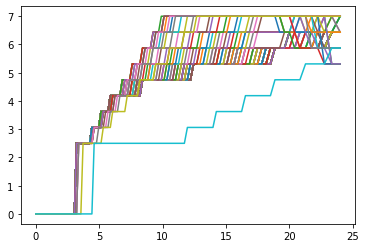

In [102]:
for t in range(0,200):
    plt.plot(model1.par.grid_x,model2.sol.d_adj[t,0,1,:])
    # plt.plot(model.par.grid_x,model.sol.c_adj[t,0,1,:])
    # plt.plot(model.par.grid_x,model.par.grid_x)

### Plot the policy functions

Non-durable Consumption

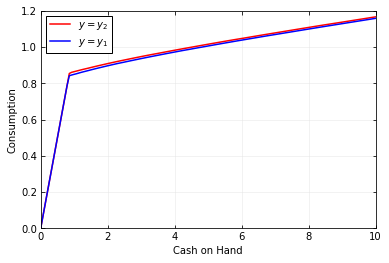

In [221]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(model.par.grid_m, model.sol.c_keep[0,0,1,10,:], color = 'red', linewidth = '1.5', label = r'$y=y_2$')
ax.plot(model.par.grid_m, model.sol.c_keep[0,0,0,10,:], color = 'blue', linewidth = '1.5', label = r'$y=y_1$')

# Plot setting
ax.set_xlabel('Cash on Hand')
ax.set_ylabel('Consumption')

ax.set_xlim(model.par.grid_m[0],model.par.grid_m[-1])
ax.set_ylim(0,1.2)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.savefig('../../tex/figs/c_keep.pdf')

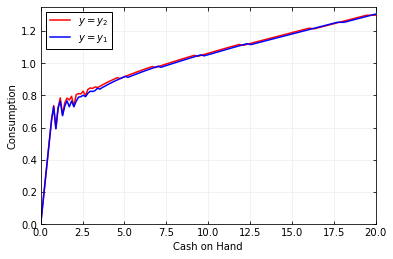

In [225]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(model.par.grid_x, model.sol.c_adj[0,0,1,:], linestyle = '-', color = 'red', linewidth = '1.5', label = r'$y=y_2$')
ax.plot(model.par.grid_x, model.sol.c_adj[0,0,0,:], linestyle = '-', color = 'blue', linewidth = '1.5', label = r'$y=y_1$')

# Plot setting
ax.set_xlabel('Cash on Hand')
ax.set_ylabel('Consumption')

ax.set_xlim(0,20)
ax.set_ylim(0,1.35)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.savefig('../../tex/figs/c_adj.pdf')

Housing demand

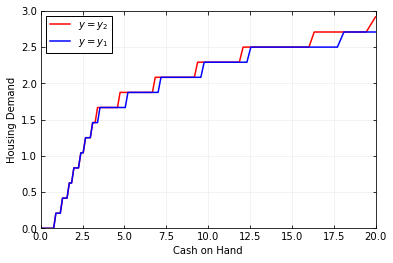

In [230]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(model.par.grid_x, model.sol.d_adj[0,0,1,:], linestyle = '-', color = 'red', linewidth = '1.5', label = r'$y=y_2$')
ax.plot(model.par.grid_x, model.sol.d_adj[0,0,0,:], linestyle = '-', color = 'blue', linewidth = '1.5', label = r'$y=y_1$')

# Plot setting
ax.set_xlabel('Cash on Hand')
ax.set_ylabel('Housing Demand')

ax.set_xlim(0,20)
ax.set_ylim(0,3)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.savefig('../../tex/figs/h_adj.pdf')

## Plot Distributions

Wealth distribution

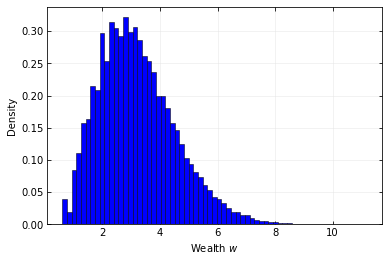

In [411]:
# Define wealth
w = model.sim.a + model.par.ph*model.sim.d
# w = model.sim.m

# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.hist(w[-1,:], bins = 65, density = True, edgecolor = 'k', linewidth=.5, zorder=2, color ='blue')

# Plot setting
ax.set_xlabel('Wealth $w$')
ax.set_ylabel('Density')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../tex/figs/w_distr.pdf')

Aggregate housing demand

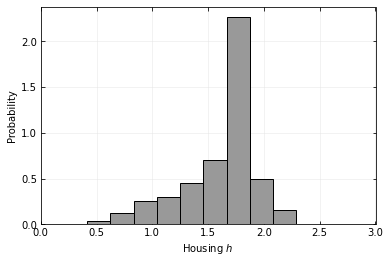

In [268]:
# Define wealth
w = model.sim.m + model.par.ph*model.sim.d

# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.hist(model.sim.d[-1,:], model.par.grid_n, density = True, facecolor='0.6', edgecolor = 'k', zorder=2)
# change this to discrete distribution - NOT density!

# Plot setting
ax.set_xlabel('Housing $h$')
ax.set_ylabel('Probability')

ax.set_xlim(0,3)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../tex/figs/h_distr.pdf')

### Plot Convergence of Simulation 

Simulate a **longer time horizon** to check for convergence

In [250]:
# Vector of aggregates
h_agg = np.mean(model.sim.d, axis=1)
n_agg = np.mean(model.sim.n, axis=1)
c_agg = np.mean(model.sim.c, axis=1)
a_agg = np.mean(model.sim.a, axis=1)
m_agg = np.mean(model.sim.m, axis=1)
y_agg = np.mean(model.sim.y, axis=1)

Divide time series with the last period value to illustrate convergence

In [251]:
h_conv = h_agg / h_agg[-1]
c_conv = c_agg / c_agg[-1]
a_conv = a_agg / a_agg[-1]

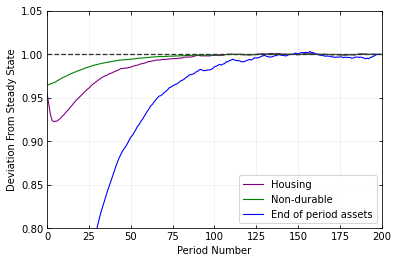

In [282]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(range(model.par.sim_T),h_conv, linestyle = '-', color = 'purple', linewidth = '1.1', label= 'Housing')
ax.plot(range(model.par.sim_T),c_conv, linestyle = '-', color = 'green', linewidth = '1.1', label='Non-durable')
ax.plot(range(model.par.sim_T),a_conv, linestyle = '-', color = 'blue', linewidth = '1.1', label='End of period assets')

ax.hlines(1,0,200, linestyle ='--', color = '0.2', linewidth = 1.3)

# Plot setting
ax.set_xlabel('Period Number')
ax.set_ylabel('Deviation From Steady State')

ax.set_xlim(0,200)
ax.set_ylim(0.8,1.05)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend()

plt.savefig('../../tex/figs/convergence.pdf')

## Descriptive Statistics from SS

Compute variables used

In [404]:
# Housing share of total consumption
# h_share = model.sim.d[-1,:] / (model.sim.d[-1,:] + model.sim.d[-1,:])
h_share = model.sim.d[-1,:] / (model.sim.c[-1,:] + model.sim.d[-1,:] + model.sim.d[-1,:])

In [387]:
# try binned scatterplot
h_demand_means, bin_edges, binnumber = stats.binned_statistic(model.sim.m[-1,:],model.sim.d[-1,:], bins = 30, statistic = 'mean')
h_share_means = stats.binned_statistic(model.sim.m[-1,:],h_share, bins = 30, statistic = 'mean').statistic

# Compute bins
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

Binscatter of housing demand as a function of beginning of period cash on hand

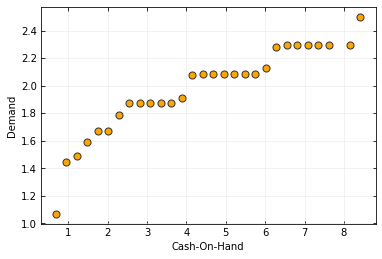

In [385]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.scatter(bin_centers, h_demand_means, s=50, c='orange', marker='o', edgecolors = '0.2', zorder=2) 

# Plot setting
ax.set_xlabel('Cash-On-Hand')
ax.set_ylabel('Demand')

# ax.set_xlim(0,200)
# ax.set_ylim(0.8,1.05)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
# ax.legend()

plt.savefig('../../tex/figs/h_demand_bins.pdf')

Binscatter of the share of housing in total consumption as a function of beginning of period cash on hand

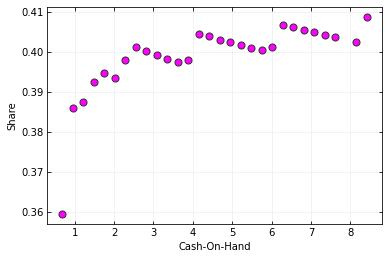

In [405]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.scatter(bin_centers, h_share_means, s=50, c='magenta', marker='o', edgecolors = '0.2', zorder=2) 

# Plot setting
ax.set_xlabel('Cash-On-Hand')
ax.set_ylabel('Share')

# ax.set_xlim(0,200)
# ax.set_ylim(0.8,1.05)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
# ax.legend()

plt.savefig('../../tex/figs/h_share_bins.pdf')